First, set the values for parameter Theta A, Thera B and Theta C. Let Theta A = 0.3, Theta B = 0.5, Theta C= 0.7.
Then, define the prior distribution of each choice. I will apply the uniform distribution which means set the prior distribution to (1,1) in the case of Beta distribution.

In [68]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
# Define the values if the parameter
Pa = 0.3
Pb = 0.5
Pc = 0.7
# Set prior distribution using the uniform distribution
prior_A = [1,1]
prior_B = [1,1]
prior_C = [1,1]
n = 0 
x = 0
alpha = 1
beta = 1
# Coin flip outcome
outcome = stats.binom(n=1,p=0.5).rvs(size=1)
#stats.bernoulli(p=0.5).rvs(size=1)
print(outcome)

[0]


Then, I went through a loop and I played each of the games 10 times in this loop.

In [69]:
for i in range(10):
    if stats.binom(n=1,p=0.5).rvs(size=1) == 1:
        x += 1
    else:
        n += 1
beta_distribution = stats.beta(a=1,b=1)
beta_distribution.pdf(0.5)   

0.9999999999999996

Text(0.5, 1.0, 'Visualization')

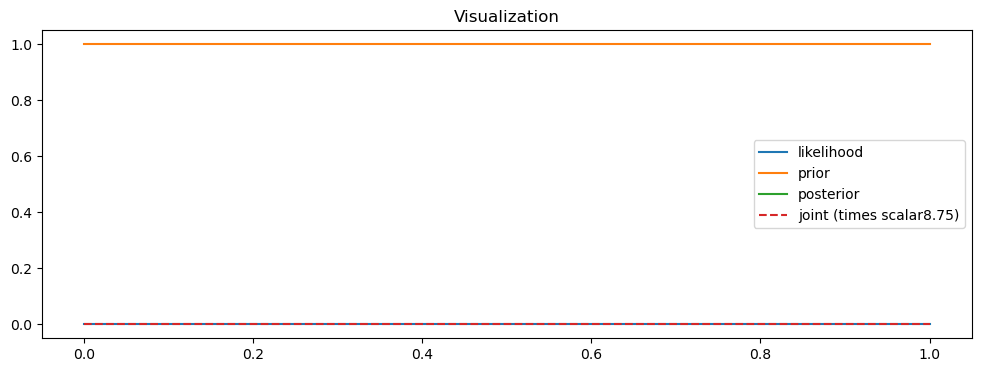

In [80]:
#update the outcome
a = x+alpha
b = n-x+beta
parameter_domain = np.linspace(0,1,1001)
prior = stats.beta(a = alpha,b = beta).pdf(parameter_domain)
likelihood = stats.binom.pmf(n=n, k=x, p=parameter_domain)
joint = alpha * likelihood * prior # elementwise multiplication
posterior = stats.beta(a,b).pdf(parameter_domain)
plt.figure(figsize=(12,4))
plt.plot(parameter_domain, likelihood, label="likelihood")
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label= "joint (times scalar"+str(c)+")")
plt.legend()
plt.title("Visualization")